In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

In [57]:
area = 'Gangnam'

In [58]:
rest = pd.read_csv(f'../crawings/area_csv/{area}/rest_concat.csv')
data = pd.read_csv(f'../crawings/user_csv/{area}/user_concat.csv')
data_concat = pd.merge(data, rest, left_on = 'rest', right_on = 'url', how = "left")
data_concat = data_concat[~data_concat['rest'].isna()]

In [59]:
#data_concat[data_concat['tag'].str.contains('72420')]#
data_concat['tag'] = data_concat['tag'].apply(lambda x : x.split(','))

In [61]:
values

{'가정식',
 '갈비탕',
 '감자탕',
 '게요리',
 '고기뷔페',
 '고기요리',
 '곰탕',
 '곱창',
 '공방',
 '과일',
 '국밥',
 '국수',
 '굴요리',
 '기사식당',
 '김밥',
 '꼬치',
 '낙지요리',
 '남미음식',
 '냉면',
 '다이어트',
 '달빛오징어광어',
 '닭갈비',
 '닭강정',
 '닭발',
 '닭볶음탕',
 '닭요리',
 '닭장수후라이드',
 '덮밥',
 '도넛',
 '도시락',
 '돈가스',
 '돼지고기구이',
 '두부요리',
 '디저트',
 '딤섬',
 '떡볶이',
 '라이브카페',
 '롤',
 '립',
 '막국수',
 '막창',
 '만두',
 '매운탕',
 '맥주',
 '먹장어요리',
 '멕시코',
 '민속주점',
 '밀키트',
 '바(BAR)',
 '바나프레소',
 '바닷가재요리',
 '백반',
 '백숙',
 '베이글',
 '베이커리',
 '베트남음식',
 '보리밥',
 '보쌈',
 '복어요리',
 '북카페',
 '분식',
 '뷔페',
 '브런치',
 '블루보틀',
 '빈대떡',
 '빙수',
 '삼계탕',
 '샌드위치',
 '샐러드',
 '샐러드뷔페',
 '생선구이',
 '생선요리',
 '생선회',
 '샤브샤브',
 '설렁탕',
 '소고기구이',
 '소바',
 '순대',
 '순댓국',
 '술집',
 '스마일명품찹쌀꽈배기',
 '스마일찹쌀꽈배기',
 '스터디카페',
 '스테이크',
 '스파게티',
 '스파게티스토리',
 '스페인음식',
 '심야오뎅',
 '쌈밥',
 '아귀찜',
 '아시아음식',
 '아이스크림',
 '양',
 '양갈비',
 '양꼬치',
 '양식',
 '오뎅',
 '오리요리',
 '오징어요리',
 '와인',
 '와플',
 '요리주점',
 '우동',
 '육류',
 '음식점',
 '이북음식',
 '이자카야',
 '이탈리아음식',
 '인도음식',
 '일도씨닭갈비',
 '일본식라면',
 '일식',
 '일식당',
 '일품향',
 '장어',
 '전',
 '전골',
 '전복요리',
 '전통',
 '정육

In [60]:
values = set()

def funs(x):
    values.update(x)
    return x

data_concat['tag'].apply(lambda x : funs(x))

0          [스테이크, 립]
1          [스테이크, 립]
2          [스테이크, 립]
3          [스테이크, 립]
4          [스테이크, 립]
             ...    
1168365         [쌈밥]
1168366         [쌈밥]
1168367         [쌈밥]
1168368         [쌈밥]
1168369         [쌈밥]
Name: tag, Length: 1168368, dtype: object

In [18]:
data['userid'] = data['link'].apply(lambda x: str(re.findall(r'my/[a-z0-9]+/', x))[5:-3])

In [19]:
data = data.drop_duplicates(['userid','rest'])
data.head(3)

,link,user,rest,userid
0,https://m.place.naver.com/my/6130db4973adbe125...,로지씨리뷰 574사진 458팔로워 46팔로우방문자리뷰방문자리뷰방문자리뷰방문자리뷰이전...,1.675303e+09,6130db4973adbe125329a3e4
1,https://m.place.naver.com/my/5daf02038f87a842b...,딴2리뷰 224사진 303팔로워 7팔로우방문자리뷰방문자리뷰방문자리뷰방문자리뷰방문자리...,1.675303e+09,5daf02038f87a842bc4da53f
2,https://m.place.naver.com/my/5c6fba93cfc813f61...,제제7225리뷰 56사진 168팔로워 3팔로우방문자리뷰방문자리뷰방문자리뷰방문자리뷰방...,1.675303e+09,5c6fba93cfc813f61e418d7f


In [20]:
100 - len(data) / (len(data['userid'].unique()) * len(data['rest'].unique())) * 100

99.91583057243874

In [26]:
data.groupby(['userid']).count()

,link,user,rest
userid,,,
,24,24,23
5b61c7658f8242cb2a1b1028,9,9,9
5b62c91cd898db2e71efcc59,2,2,2
5b62d3b7906905381fbd623a,1,1,1
5b62e55e10599e4793d54f8a,1,1,1
...,...,...,...
63b7b6b8abbacd00063f8407,1,1,1
63b943ae9ad79c4c19386bdf,1,1,1
63ba9a3e1438fc3a9c9e1618,1,1,1


<AxesSubplot: >

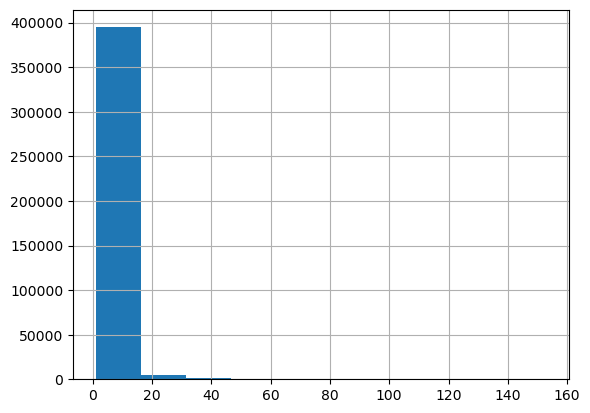

In [21]:
tem = data['userid'].value_counts()
tem.hist()

In [24]:
tem[tem > 5]

5b9b838c21b2eab77f739133    153
5bc69fac446df35606a76b9d    146
5dcfce8b8f87a842bcc962d8    142
5d7a014d8f87a842bcc7940b    139
5b9b32873671c97c9ae39b6b    139
                           ... 
5cb175f5febed35c6b8ef3a4      6
5cbd9813e112c9bbd51e33c4      6
5da1f5c48f87a842bc94bccd      6
5f0652f73b535016872ab61e      6
5e0c13aa8f87a842bc008be4      6
Name: userid, Length: 32683, dtype: int64

<AxesSubplot: >

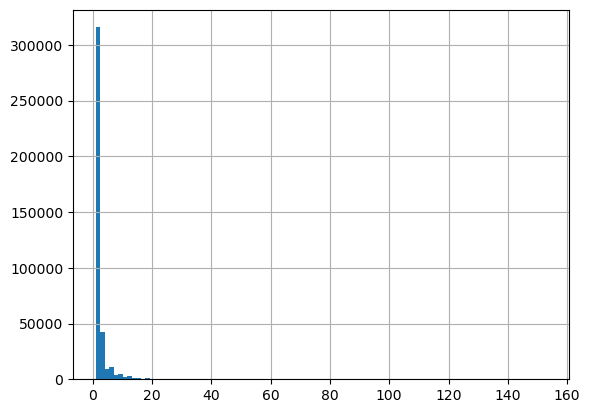

In [22]:
tem.hist(bins = 100)

In [35]:
data.drop(columns=["len", 'rest'], inplace=True)

In [37]:
test['link']

0         https://m.place.naver.com/my/5e6cf9188f87a842b...
1         https://m.place.naver.com/my/5bf2ff7e24985666f...
2         https://m.place.naver.com/my/5c4be21cc5ad8f866...
3         https://m.place.naver.com/my/5c01351971707708c...
4         https://m.place.naver.com/my/5d23fdcac0a4f6992...
                                ...                        
512459    https://m.place.naver.com/my/5edb0a9a8f87a842b...
512460    https://m.place.naver.com/my/5efddb1267c6d4320...
512461    https://m.place.naver.com/my/5c216c0f1962c56f2...
512462    https://m.place.naver.com/my/5d49103b9b890b505...
512463    https://m.place.naver.com/my/5ba1fda47b1f543d3...
Name: link, Length: 512464, dtype: object

In [115]:
test

,restaurant,tag,url,rating,count,userid
0,아빌스 베이커리,베이커리,1813071841,NaN,40.0,5e6cf9188f87a842bc7b797d
1,아빌스 베이커리,베이커리,1813071841,NaN,40.0,5bf2ff7e24985666f8f90f91
2,아빌스 베이커리,베이커리,1813071841,NaN,40.0,5c4be21cc5ad8f866e1ad0db
3,아빌스 베이커리,베이커리,1813071841,NaN,40.0,5c01351971707708c6ea27e2
4,아빌스 베이커리,베이커리,1813071841,NaN,40.0,5d23fdcac0a4f6992dbbd069
...,...,...,...,...,...,...
512459,에그드랍 연신내역점,샌드위치,1767206129,4.28,999.0,5edb0a9a8f87a842bcb3a6fd
512460,에그드랍 연신내역점,샌드위치,1767206129,4.28,999.0,5efddb1267c6d4320f56ba07
512461,에그드랍 연신내역점,샌드위치,1767206129,4.28,999.0,5c216c0f1962c56f29f2b3d7
512462,에그드랍 연신내역점,샌드위치,1767206129,4.28,999.0,5d49103b9b890b505c2ad718


In [104]:
test['userid'] = test['link'].apply(lambda x: str(re.findall(r'my/[a-z0-9]+/', x))[5:-3])

In [106]:
test.drop(columns=['link'], inplace=True)

In [112]:
test.drop(columns=['review'], inplace=True)

In [114]:
test.drop(columns=['user'], inplace=True)

In [110]:
test['userid'].value_counts().describe()

count    97208.000000
mean         5.271829
std         13.653532
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        812.000000
Name: userid, dtype: float64

In [95]:
test.dtypes

link           object
user           object
restaurant     object
tag            object
url             int64
review         object
rating        float64
count         float64
userid         object
dtype: object

In [82]:
data['userid'] = data['userid'].astype('str')

KeyError: 'userid'

In [101]:
test.iloc[1][-1][5:-3]

'5bf2ff7e24985666f8f90f91'

In [ ]:
data['url']= data['url'].apply(lambda x: re.findall(r'/[0-9]+', x)[0][1:])
data['review'] = data['review'].apply(lambda x: re.findall(r'[\d{1.2}]+', x))
data['len'] = data['review'].apply(lambda x : len(x))
data = data[data['len'] > 0]
data['rating'] = data['review'].apply(lambda x: x[0] if len(x) == 2 else np.nan)
data['count'] = data['review'].apply(lambda x: x[1] if len(x) == 2 else x[0])
data

In [ ]:
data['count'] = data['count'].astype('float')
data['count']

In [ ]:
data = data.drop_duplicates('url') # restaurant

In [ ]:
data.to_csv('./save_csv/river_behind_concat.csv', index=False)